In [1]:
# import trecs
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from collections import defaultdict
from chaney_utils import (
    load_sim_results,
    merge_results,
    graph_metrics,
    graph_metrics_loglog,
    graph_relative_to_ideal,
)
DEBUG = True
id_to_readable = {
    "ideal": "ideal", 
    "target_ideal": "target ideal",
    "content_chaney": "content filtering basic",
    "content_chaney_j_1.0": "content filtering a=1.0",
    "content_chaney_j_3.0": "content filtering a=3.0",
    "content_chaney_j_0.5": "content filtering a=0.5",
    "popularity": "popularity", 
    "random": "random"
}

In [2]:
# results = merge_results(["udpc_ouput_unnorm"])
results = merge_results(["udpc_ouput"])

startup_iters = 50
sim_iters = 350
timesteps = startup_iters + sim_iters

In [3]:
target_profs = np.array(results['target_user_profiles']['ideal']) 
num_sims, num_steps, num_creators, num_attrs = target_profs.shape

actual_profs_strong_j = np.array(results['actual_user_profiles']['content_chaney_j_3.0']) 
actual_profs_normal_j = np.array(results['actual_user_profiles']['content_chaney_j_1.0'])
actual_profs_weak_j = np.array(results['actual_user_profiles']['content_chaney_j_0.5']) 

actual_profs_content = np.array(results['actual_user_profiles']['content_chaney']) 

actual_profs_ideal = np.array(results['actual_user_profiles']['ideal']) 
actual_profs_target_ideal = np.array(results['actual_user_profiles']['target_ideal']) 
actual_profs_rand = np.array(results['actual_user_profiles']['random'])
actual_profs_pop = np.array(results['actual_user_profiles']['popularity'])

In [4]:

""" FUNCTIONS """
nA = 20 #number of atributes
width = 0.3 #for the bar plots
u = 0

def plot_profiles(blue, model, b_ts=0, orange=target_profs, o_ts=0, user=u, norm_axis=True, norm_prefs=True):    
    if norm_prefs:
        plt.bar(np.arange(nA), normalize_preferences(blue[0, b_ts, user, :]), width, label="$U$ at t={}".format(b_ts))
        plt.bar(np.arange(nA) + width, normalize_preferences(orange[0, o_ts, user, :]), width, label="$U$ at t={}".format(o_ts))
    else:
        plt.bar(np.arange(nA), blue[0, b_ts, user, :], width, label="$U$ at t={}".format(b_ts))
        plt.bar(np.arange(nA) + width, orange[0, o_ts, user, :], width, label="$U$ at t={}".format(o_ts))
    
    if norm_axis:
        plt.ylim(0, 1) # to equalize the y axes
    plt.xticks(np.arange(nA) + width/2, np.arange(nA)+1)
    plt.xlabel("Item Attribute Index")
    plt.ylabel("Expected Item Attribute Value")
    plt.legend()
    plt.title("Start vs End Preferences of simulation - {}".format(model))
    plt.show()
    
def plot_single_profiles(blue, orange, blabel, olabel): 
    plt.bar(np.arange(nA), blue, width, label=blabel)
    plt.bar(np.arange(nA) + width, orange, width, label=olabel)
    plt.xticks(np.arange(nA) + width/2, np.arange(nA)+1)
    plt.xlabel("Item Attribute Index")
    plt.ylabel("User Preference Distribution")
    plt.legend()
    plt.show()
    
def normalize_preferences(dirichlet_params, multiplier = 0.1):
    """
    Calculate the average item profile for a given vector of parameters
    for the Dirichlet distribution. 
    """
    multiplier = 1.0 
    a0 = (multiplier * dirichlet_params).sum()
    return (multiplier * dirichlet_params) / a0

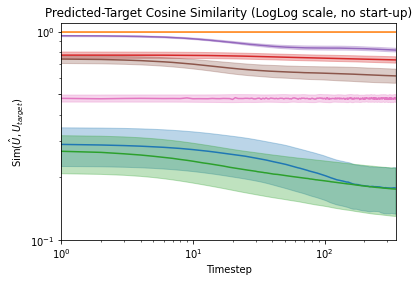

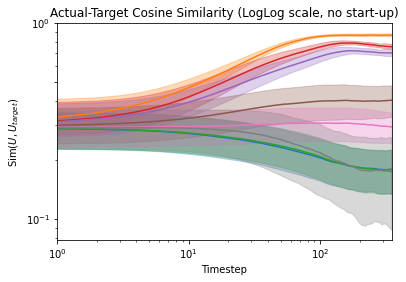

In [5]:

# no popularity bc its representation of users is not comparable to the target distribution
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random"]#, "popularity"]

# x_line = 120
# plt.vlines(x_line, 0, 1)
# plt.vlines(x_line, 0, 1)

metric_str = 'predicted_target_similarity'
graph_metrics_loglog(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)
plt.xlim(1, timesteps-50)
plt.yticks([0.1, 0.5, 1])
# plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("Sim($\hat U, U_{target}$)")
plt.title("Predicted-Target Cosine Similarity (LogLog scale, no start-up)")
plt.savefig("figures/predicted_target_sim_loglog.pdf", bbox_inches='tight')
plt.show()

model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random", "popularity"]
metric_str = 'actual_target_similarity'
graph_metrics_loglog(results, metric_str, model_keys, id_to_readable, mult_sd=1.0, conf_sigma=3.0)
plt.xlim(1, timesteps-50)
plt.yticks([0.1, 0.5, 1])
# plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("Sim($U, U_{target}$)")
plt.title("Actual-Target Cosine Similarity (LogLog scale, no start-up)")
plt.savefig("figures/actual_target_sim_loglog.pdf", bbox_inches='tight')
plt.show()


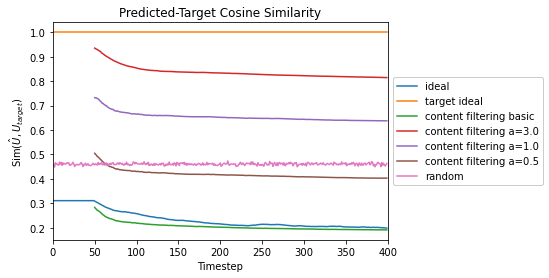

In [6]:
results = merge_results(["udpc_ouput_unnorm"])
model_keys = ["ideal", "target_ideal", "content_chaney", "content_chaney_j_3.0", "content_chaney_j_1.0", "content_chaney_j_0.5", "random"]#, "popularity"]

# x_line = 120
# plt.vlines(x_line, 0, 1)
# plt.vlines(x_line, 0, 1)

metric_str = 'predicted_target_similarity'
graph_metrics(results, metric_str, model_keys, id_to_readable)
plt.xlim(0, timesteps)
plt.legend(facecolor='white', framealpha=1, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Timestep")
plt.ylabel("Sim($\hat U, U_{target}$)")
plt.title("Predicted-Target Cosine Similarity")
plt.savefig("figures/predicted_target_sim_unnorm.pdf", bbox_inches='tight')
plt.show()


2.0124869625604775 0.9986290409767498


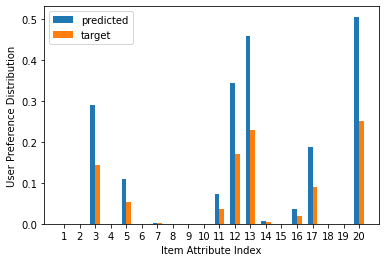

(0.9999650568390979, -0.6997176886833786)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.special import rel_entr


def kl_divergence(target, actual):
       return np.sum(rel_entr(target, actual))

predicted_user = np.array([0.0, 0.0, 0.29043173608033446, 0.0, 0.1085056567290972, 0.0, 0.0019562951206092524, 0.0, 0.0, 0.0, 0.07183331693841713, 0.34422021056592106, 0.45870251963767866, 0.006837227488419745, 0, 0.036, 0.188, 0, 0, 0.506])
target_user = np.array([0.0, 0.0, 0.14462380242204606, 0.0, 0.054031631915469135, 0.0, 0.0009741595144545318, 0.0, 0.0, 0.0, 0.0357702211763396, 0.1714083880584967, 0.22841616231713968, 0.0034046755728040917, 0, 0.018, 0.09, 0,0,0.252])

cosine = predicted_user.dot(target_user) / (np.linalg.norm(predicted_user)* np.linalg.norm(target_user))

print(predicted_user.sum(), target_user.sum())

kld = kl_divergence(target_user, predicted_user)

plot_single_profiles(predicted_user, target_user, "predicted", "target")

# to complete the measurement, call `self.observe(metric_value)`
cosine, kld

In [ ]:

before_drift = np.array([0.0, 0.0, 0.29043173608033446, 0.0, 0.1085056567290972, 0.0, 0.0019562951206092524, 0.0, 0.0, 0.0, 0.07183331693841713, 0.34422021056592106, 0.45870251963767866, 0.006837227488419745, 0, 0.036, 0.188, 0, 0, 0.506])


plot_single_profiles(before_drift, after_drift, "predicted", "target")

# to complete the measurement, call `self.observe(metric_value)`
cosine, kld